# **TikTok_Exploratory_Analysis**
---
Create by: Sada

### ***Use Case:***
In this repo, I will be doing Exploration Data Analysis (EDA) on the from google play store Mobile app reviews for TikTok.

### ***Business Understanding***
* The dataset can be used to identify key insights related to the app, key problems/issues people have raised.
* Perform sentiment analysis of the reviews and find what people are talking about.
* Perform topic modeling to identify key topics mentioned in the review over time
* Generate visualizations of different worlds / n-grams / topics extracted from the reviews.

### ***Data Understanding***
* Data Source : 3.5M Tiktok Mobile App Reviews 
https://www.kaggle.com/shivamb/35-million-tiktok-mobile-app-reviews

* 3.5M Tiktok Mobile App Reviews, all the publicly posted reviews are scraped from Tiktok App on Google Play Store
* Totl data of 3,646,476 row.
* Data of Tiktok Mobile App Review from 11 Agustus 2015 to 22 September 2021
* review_id: ID Review of Users.
* review_text: A writing/text containing an evaluation or review of a publication.
* upvotes: To make comments more popular.
* app_version: App version information for the apps user used.
* posted_date: The day and time when each review was made.

### ***Data Preparation***
* Data Used:
https://www.kaggle.com/codechick/tiktok-exploratory-analysis/notebook

* Programming used: Pyhon
* Library/Package used: pandas, seaborn, matlotlib, numpy



In [2]:
#Import Package

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to Drive 

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
# Import Dataset

data = pd.read_csv('drive/MyDrive/bc-ds-dataset/tiktok_app_reviews.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [74]:
# Show dataset
data.head()
# df

,review_id,review_text,upvotes,app_version,posted_date
0,gp:AOqpTOGSsGv5rOA79ttW2LE0FeMYvkdUuXRMTfbyMk0...,It is an excellent solution to finding videos ...,402,21.2.5,2021-09-20 07:50:23
1,gp:AOqpTOEDQ9__FJihY_0V4iwqy4P2OK8tGVR1tFBixYb...,Great app works really well so many features s...,67,21.2.5,2021-09-19 23:10:47
2,gp:AOqpTOEGEfr8TL0iKTlpbTDeM8P7HywlMmP9CkHMoaT...,I down loaded app but didnt work . i love this...,24,21.2.5,2021-09-19 08:59:34
3,gp:AOqpTOGZBDl9dpghmb43Mx1tnlWCOjNXyuVn5Mxf49c...,IT A GREAT APP AND FUN TO USE! HOWEVER ARBITRA...,18,21.2.5,2021-09-19 16:34:43
4,gp:AOqpTOFioH3wud_JnC4aPCG4p7s5DEEN2yZAWNXdRJj...,Currently it's working good for me except a fe...,232,21.1.41,2021-09-14 06:35:02


In [75]:
# Check out the dimension of the dataset

data.shape

(3646476, 5)

In [16]:
# Show data column
data.columns

Index(['review_id', 'review_text', 'upvotes', 'app_version', 'posted_date'], dtype='object')

In [29]:
# Look at the data types for each column
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646476 entries, 0 to 3646475
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   review_text  object
 2   upvotes      int64 
 3   app_version  object
 4   posted_date  object
dtypes: int64(1), object(4)
memory usage: 139.1+ MB


In [25]:
data.describe()

,upvotes
count,3.646476e+06
mean,6.874999e-01
std,3.800550e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.884200e+04


* **From 5 columns, only 1 column has an integer data type, namely upvotes**
* **The min and max values for Upvotes are min: 0 and max: 28,842. This can represent more popular user reviews.**






In [26]:
data.nunique()

review_id      3646473
review_text    1937087
upvotes           1135
app_version        784
posted_date    3571810
dtype: int64

### Data Cleaning
---

#### Check Missing Value

In [138]:
# Knowling number of missing value for each variable
data.isnull().sum()

# or can use code this
# data.isna().sum()

review_id           0
review_text       101
upvotes             0
app_version    993269
posted_date         0
dtype: int64

* **There are about 27.24% missing value of App Version, which is 993.269 rows**
* **There are about 0.01% missing value of Review Users, which is 101 rows**
* **We need to remove it,because we could't get the user review and the version of the app used.**

In [139]:
# Remove missing value of review_text and app_version

data['review_text'].fillna('Unknown', inplace=True)
data['app_version'].fillna('Unknown', inplace=True)

In [140]:
# Check again number of missing value for each variable, whether it has been deleted

data.isna().sum()

review_id      0
review_text    0
upvotes        0
app_version    0
posted_date    0
dtype: int64

In [141]:
# Check the default structure of posted_date, is it already using datetime64[s]

date = pd.to_datetime(data['posted_date'])
date

0         1970-01-01 00:00:00.000002022
1         1970-01-01 00:00:00.000002022
2         1970-01-01 00:00:00.000002022
3         1970-01-01 00:00:00.000002022
4         1970-01-01 00:00:00.000002022
                       ...             
3646471   1970-01-01 00:00:00.000002022
3646472   1970-01-01 00:00:00.000002022
3646473   1970-01-01 00:00:00.000002022
3646474   1970-01-01 00:00:00.000002022
3646475   1970-01-01 00:00:00.000002022
Name: posted_date, Length: 3646476, dtype: datetime64[ns]

#### Check Duplicate Data

In [142]:
data.duplicated().value_counts()

False    3646476
dtype: int64

**No duplicate rows**

### Data Manipulation
---
Rename The Column

In [69]:
# data.rename(columns={
#     'review_id':'ID Review',
#     'review_text':'Review Comments',
#     'upvotes':'Upvotes',
#     'app_version':'App Version',
#     'posted_date':'Date'
# }, inplace=True)

In [76]:
data.columns

Index(['review_id', 'review_text', 'upvotes', 'app_version', 'posted_date'], dtype='object')

In [77]:
#timebound

print(data["posted_date"].min())
print(data["posted_date"].max())

2015-07-11 07:37:08
2021-09-22 15:04:24


**The dataset was taken for 6 years, from 11 August 2015 to 22 September 2021.**

### Data Exploratory
---

#### How many review users every month?

In [143]:
#Aggregating the Reviews by Month

# get year from the corresponding
# posted_date column value

# df['birthdate'].groupby(df.birthdate.dt.to_period("M")).agg('count')

# df_agg = data.groupby("posted_date").upvotes.sum()
# df_aggYear = pd.DatetimeIndex(data['posted_date']).year
# df_aggYear

#### How many versions of the app are used by the user

In [123]:
df_agg = data.groupby("app_version").upvotes.count()
df_agg

app_version
0.8.13          311
1.0.0             2
1.0.1            36
1.0.2             2
1.0.3           423
1.1.0             1
1.1.2           168
1.1.3             4
1.1.4          1149
10.0.1            7
10.0.2            4
10.0.3            5
10.1.0         4102
10.1.1         3680
10.1.10        9902
10.1.5           50
10.1.7            1
10.1.8            2
10.1.9         3591
10.2.11           2
10.2.6            1
10.2.9            1
10.3.9            2
10.4.0        12642
10.4.6            2
10.4.8            3
10.5.0        21385
10.5.9            2
10.6.0         2210
10.6.10           2
10.6.6            1
10.6.8            2
10.7.0          924
10.7.1        14891
10.7.6            1
10.7.7            1
10.7.8            5
10.8.0        18830
10.8.6            2
10.8.9            2
10.9.0         2163
10.9.9            7
11.0.0           92
11.0.1          101
11.0.2          181
11.0.3         9897
11.0.8           11
11.1.0           80
11.1.1           30
11.1.2  

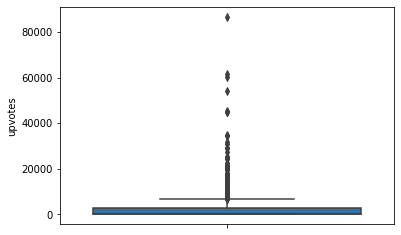

In [122]:
sns.boxplot( y = df_agg )

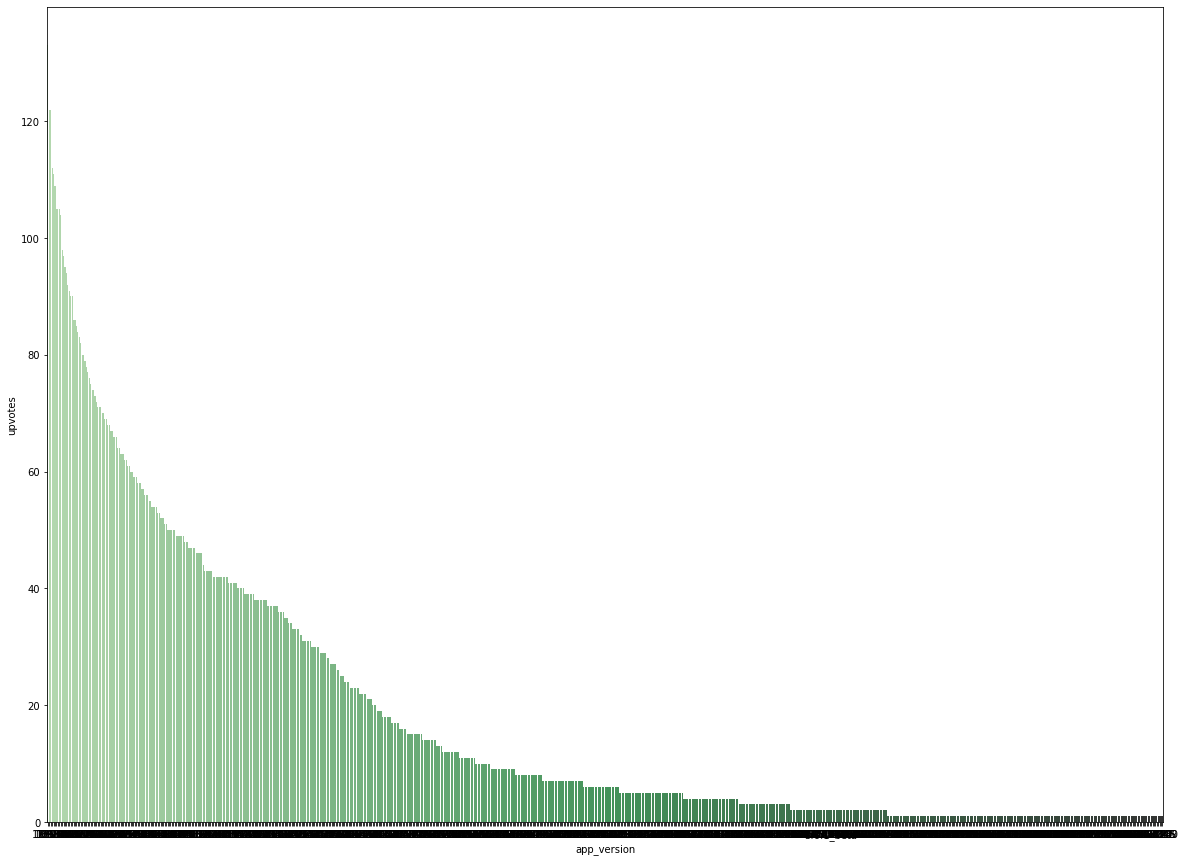

In [137]:
# df_agg = data.groupby("app_version").upvotes.count()
# df_agg



sq1=data.groupby('app_version')['upvotes'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,15))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="app_version", y="upvotes", palette = "Greens_d");